## This Notebook will generate some synthetic Data.

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

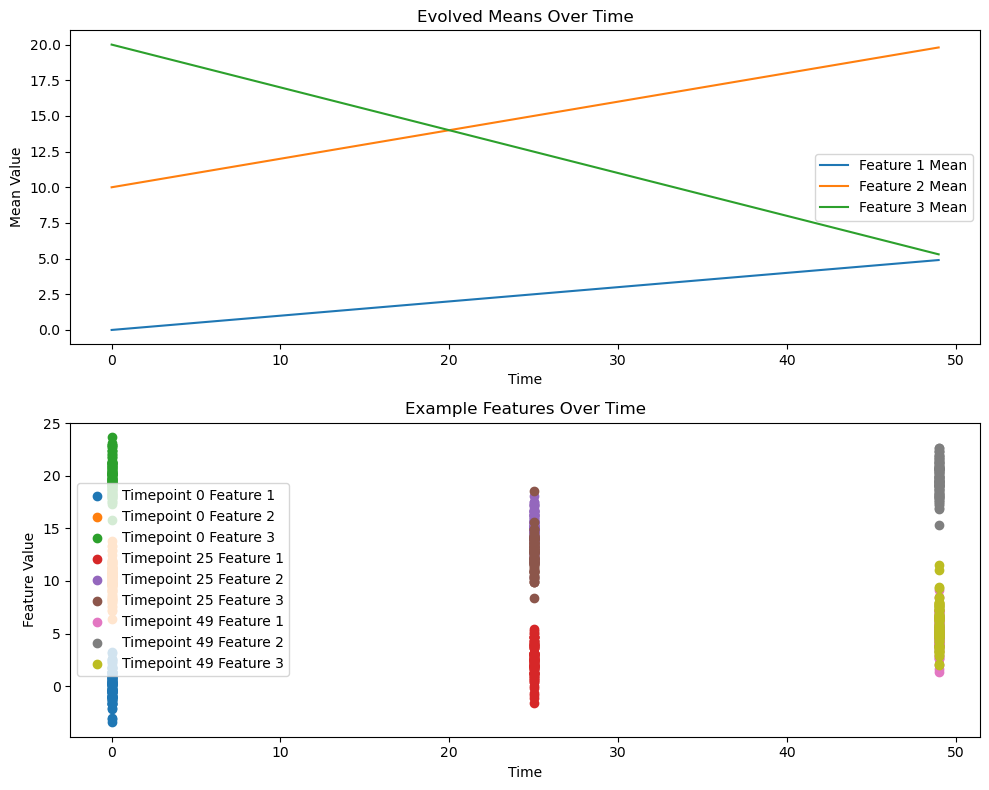

In [2]:
np.random.seed(1)

# Function to generate the data
def generate_gaussian_data(N, t, mean_evolution_function):
    """
    Generate N samples of 3 features from Gaussian distributions with evolving means over t timepoints.
    
    Parameters:
    N (int): Number of samples to generate.
    t (int): Number of timepoints.
    mean_evolution_function (function): Function that defines how the mean evolves over time.
    
    Returns:
    data (ndarray): Generated data of shape (t, N, 3).
    means (ndarray): Evolved means of shape (t, 3).
    """
    # Initialize the data container
    data = np.zeros((t, N, 3))
    # Initialize the means container
    means = np.zeros((t, 3))
    
    # Standard deviation for the Gaussian distributions (same for all features and timepoints)
    std_dev = 1.5
    
    # Generate the data
    for timepoint in range(t):
        # Evolve the means
        means[timepoint, :] = mean_evolution_function(timepoint)
        # Sample the data from Gaussian distributions with the current means
        for feature in range(3):
            data[timepoint, :, feature] = np.random.normal(means[timepoint, feature], std_dev, N)
    
    return data, means

# Example of a mean evolution function
def linear_mean_evolution(timepoint):
    """
    Example of a linear mean evolution function.
    
    Parameters:
    timepoint (int): The current timepoint.
    
    Returns:
    evolved_means (ndarray): The means for the current timepoint.
    """
    # Define the initial mean values for the three features
    initial_means = np.array([0, 10, 20])
    # Define how much the mean should change per timepoint for each feature
    mean_changes = np.array([0.1, 0.2, -0.3])
    # Calculate the evolved means
    evolved_means = initial_means + mean_changes * timepoint
    return evolved_means

# Parameters
N = 100  # Number of samples
t = 50   # Number of timepoints

# Generate the data
data, means = generate_gaussian_data(N, t, linear_mean_evolution)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the evolved means over time
for feature in range(3):
    ax[0].plot(means[:, feature], label=f'Feature {feature+1} Mean')

ax[0].set_title('Evolved Means Over Time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Mean Value')
ax[0].legend()

# Plot some example features over time
timepoints_to_plot = [0, t//2, t-1]  # Start, middle, and end timepoints
for timepoint in timepoints_to_plot:
    for feature in range(3):
        ax[1].scatter([timepoint]*N, data[timepoint, :, feature], label=f'Timepoint {timepoint} Feature {feature+1}')

ax[1].set_title('Example Features Over Time')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Feature Value')
ax[1].legend()

plt.tight_layout()
plt.show()


In [3]:
# Define the modified generate_gaussian_data_padded function to concatenate features for 4 subsequent time points
def generate_gaussian_data_subsequent(N, t, mean_evolution_function, padding_value=0):
    data, means = generate_gaussian_data(N, t, mean_evolution_function)
    # Pad the first 3 timepoints with the padding_value to handle the edge case for the first timepoint
    padded_data = np.pad(data, ((3, 0), (0, 0), (0, 0)), 'constant', constant_values=(padding_value,))
    # Concatenate features for 4 subsequent time points
    concatenated_data = np.array([padded_data[i:i+4].reshape(N, -1) for i in range(t)])
    return concatenated_data, means

# Redefine relu and numpy_mlp as they are unchanged
def relu(x):
    return np.maximum(0, x)

def numpy_mlp(input_data, input_size, hidden_size, output_size):
    # Initialize random weights and biases
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.random.randn(hidden_size)
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.random.randn(output_size)
    # Forward pass through the first layer
    hidden_layer = relu(np.dot(input_data, W1) + b1)
    # Forward pass through the second layer
    output_layer = np.dot(hidden_layer, W2) + b2
    return output_layer

# Parameters
N = 100  # Number of samples
t = 50   # Number of timepoints
input_size = 12  # 3 features * 4 timepoints
hidden_size = 6  # Hidden layer size
output_size = 1  # Output size (score)

# Generate the data and scores
data, means = generate_gaussian_data(N, t, linear_mean_evolution)
scores = numpy_mlp(data.reshape(-1, 3), 3, hidden_size, output_size)

# Reshape scores to have the same structure as data for convenience
scores_reshaped = scores.reshape(t, N)

First 10 rows of X:
[[  1.27595227   9.54846358  20.85720602  -1.64091683   9.87920396
   19.79684707   1.28603389   7.85322545  20.91685084 -12.88502684
  -13.4544939  -10.52552888]
 [  2.20997386  11.65786981  18.99403718  -1.583167    11.18520026
   20.05024461  -0.04062507  10.56648427  19.2129286  -11.82439927
  -13.99965919 -11.55200283]
 [ -0.92840477  11.05774027  22.5209386    1.42134289  11.17826507
   20.24102632  -0.02911758  10.7903552   20.34028982 -11.02182527
  -12.92108594 -14.07124628]
 [  0.58342951   9.42812911  19.55730223   0.10258364   9.10664803
   14.84611128  -1.09392046  10.77896996  20.88441997 -15.48535035
  -15.3437337  -12.31357047]
 [  0.14239771   9.17998712  20.2529877   -1.48317904   9.36535807
   19.79439613   1.4700276   12.05665104  20.82063918 -13.31518386
  -13.60404167 -14.27290144]
 [  0.79036633   8.96725359  18.84522703  -0.22808487  12.00004053
   21.56043576   0.07534619  10.25667179  21.31848    -13.26723321
  -11.19362625 -14.74108972]
 [

(array([  4.,  57., 332., 800., 975., 953., 932., 676., 247.,  24.]),
 array([-30.86821837, -28.57512343, -26.28202849, -23.98893356,
        -21.69583862, -19.40274369, -17.10964875, -14.81655382,
        -12.52345888, -10.23036394,  -7.93726901]),
 <BarContainer object of 10 artists>)

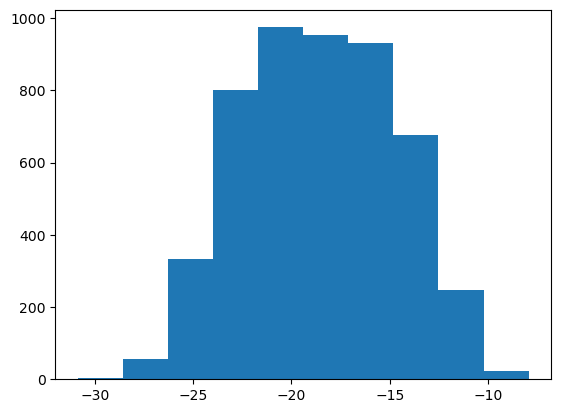

In [12]:


# Initialize X and y
X = np.zeros((t-3, N, 12))  # 3 subsequent time points * (3 features + 1 score)
y = np.zeros((t-3, N))
labels=np.zeros((t-3, N))

# Define the threshold for the difference
diff = 3

# Construct X, y, and labels
for i in range(t-3):
    # Features from time i, i+1, and i+2
    X[i, :, :9] = data[i:i+3].reshape(N, -1)
    # Scores from time i, i+1, and i+2
    X[i, :, 9:] = scores_reshaped[i:i+3].T
    # y is the score at the next time-step, i+3
    y[i, :] = scores_reshaped[i+3]
    # Determine if the score at time i+3 is different by more than 'diff' from any of the previous scores
    labels[i, :] = np.any(np.abs(scores_reshaped[i+3] - scores_reshaped[i:i+3]) > diff, axis=0).astype(int)

# Reshape X to be two-dimensional as expected for machine learning tasks
X_reshaped = X.reshape((t-3)*N, -1)

# Flatten y to be one-dimensional
y_flattened = y.flatten()

# Flatten labels to be one-dimensional
labels_flattened = labels.flatten()


print("First 10 rows of X:")
print(X_reshaped[:10])
print("First 10 elements of y:")
print(y_flattened[:10])

plt.hist(scores)

(array([2257.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2443.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

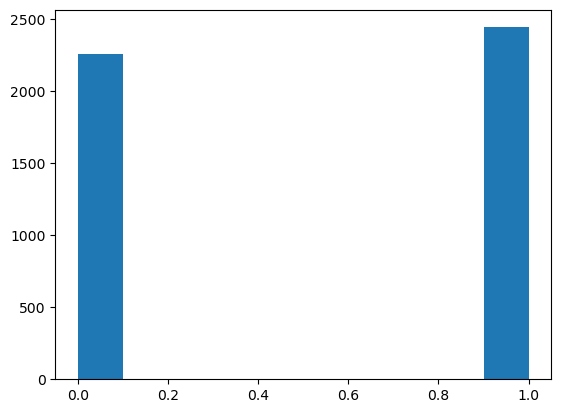

In [13]:
plt.hist(labels_flattened)

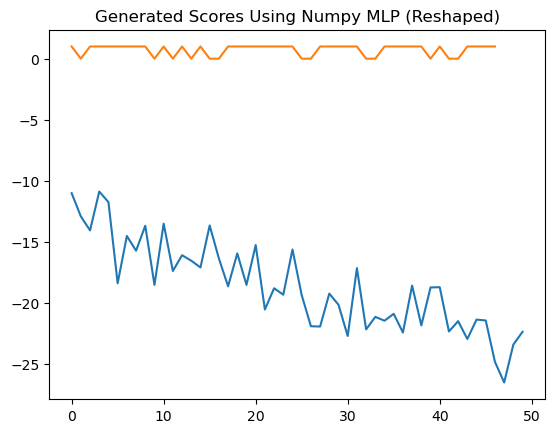

In [14]:
## plot an example

plt.plot(scores_reshaped[:, 2], label='Generated Score for First Feature Series')
plt.title('Generated Scores Using Numpy MLP (Reshaped)')
plt.plot(labels[:,2], label='Generated Score for First Feature Series')

In [15]:
## prepare a pandas dataframe for the data and save data
df = pd.DataFrame(X_reshaped)
df['score'] = y_flattened
df['label'] = labels_flattened
df.to_csv('data.csv', index=False)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_reshaped,labels_flattened,test_size=0.2,random_state=42)

In [17]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [18]:
y_pred=model.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.59      0.57       437
         1.0       0.62      0.58      0.60       503

    accuracy                           0.58       940
   macro avg       0.58      0.58      0.58       940
weighted avg       0.59      0.58      0.58       940

